In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from reinforce_learning import Agent
from dataset import Dataset

In [2]:
TICKER = "BTCUSDT"
data_binance = Dataset()
data = data_binance.get_data(days=90, ticker=TICKER, ts='1H')

In [3]:
data['reward'] = data['close'].pct_change().shift(-1)

In [4]:
data.head(1)

,open,high,low,close,volume,reward
time,,,,,,
2021-03-08 01:00:00,50959.11,51685.0,50843.59,51491.1,3257.854652,0.001293


In [5]:
# What is min max scaller?
scaler = MinMaxScaler()
scaler.fit(data.drop(['reward'], axis=1).values)

MinMaxScaler()

In [6]:
train = pd.DataFrame(
    scaler.transform(data
                        .drop(['reward'], axis=1)
                        .values)
)
train.head(1)

,0,1,2,3,4
0,0.57891,0.580672,0.608039,0.59536,0.073518


In [7]:
train.loc[:, 'time'] = data.index
train.loc[:, 'open_price'] = data['close'].values
train.loc[:, 'close_price'] = data['close'].shift(-1).values
train.loc[:, 'reward'] = train['close_price'] - train['open_price']
train.head(2)

,0,1,2,3,4,time,open_price,close_price,reward
0,0.57891,0.580672,0.608039,0.595360,0.073518,2021-03-08 01:00:00,51491.1,51557.70,66.60
1,0.59536,0.585842,0.619896,0.597419,0.058293,2021-03-08 02:00:00,51557.7,50730.82,-826.88


  0%|          | 0/99 [00:00<?, ?it/s]{'epoch': 1, 'total_profit': -1167.6299999999756}
Episode: 2/20
  0%|          | 0/99 [00:00<?, ?it/s]{'epoch': 2, 'total_profit': 1099.25}
Best result: 1099.25
1_hour_bitcoin_test
Episode: 3/20
100%|██████████| 99/99 [00:14<00:00,  7.01it/s]
{'epoch': 3, 'total_profit': 1090.4200000000346}
  0%|          | 0/99 [00:00<?, ?it/s]{'epoch': 4, 'total_profit': 7160.130000000034}
Best result: 7160.130000000034
1_hour_bitcoin_test
Episode: 5/20
  0%|          | 0/99 [00:00<?, ?it/s]{'epoch': 5, 'total_profit': 673.6899999999732}
Episode: 6/20
100%|██████████| 99/99 [00:13<00:00,  7.43it/s]
{'epoch': 6, 'total_profit': 6375.069999999956}
  0%|          | 0/99 [00:00<?, ?it/s]{'epoch': 7, 'total_profit': 10045.960000000006}
Best result: 10045.960000000006
1_hour_bitcoin_test
Episode: 8/20
  0%|          | 0/99 [00:00<?, ?it/s]{'epoch': 8, 'total_profit': 7221.0600000000195}
Episode: 9/20
  0%|          | 0/99 [00:00<?, ?it/s]{'epoch': 9, 'total_profit': 40

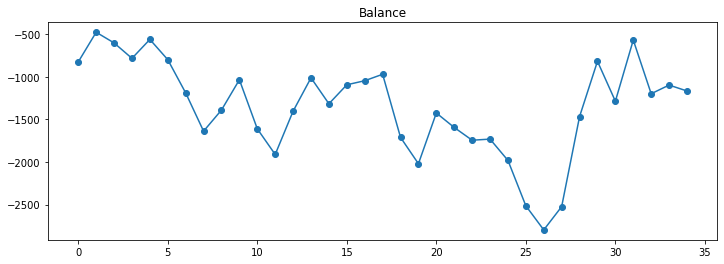

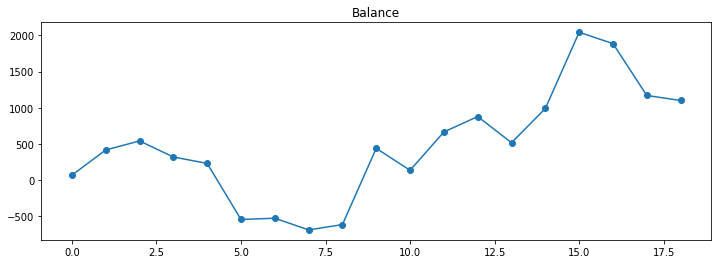

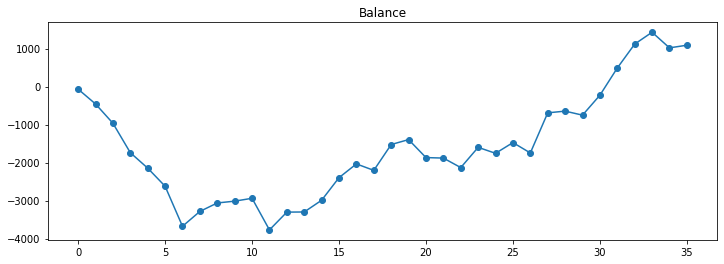

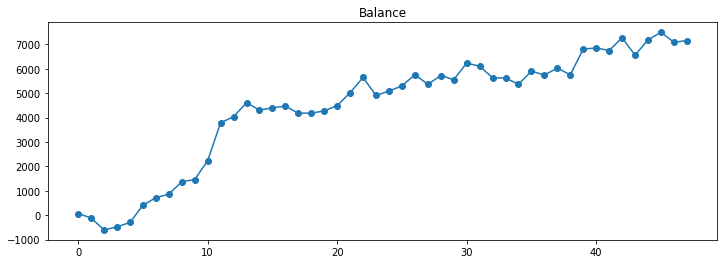

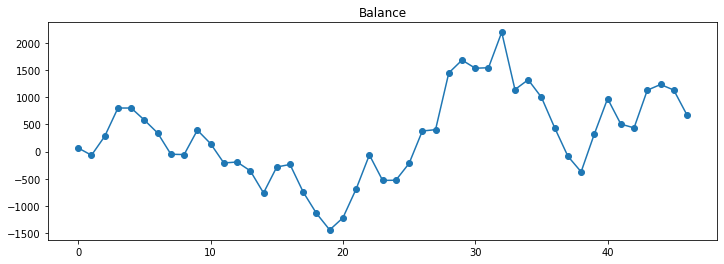

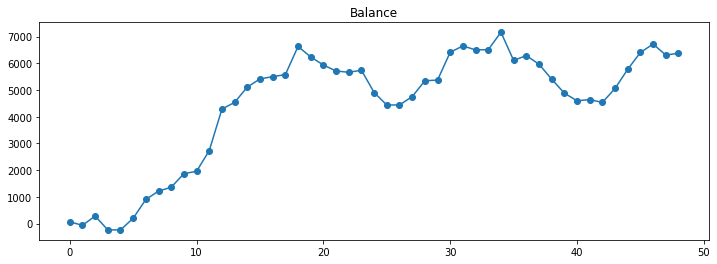

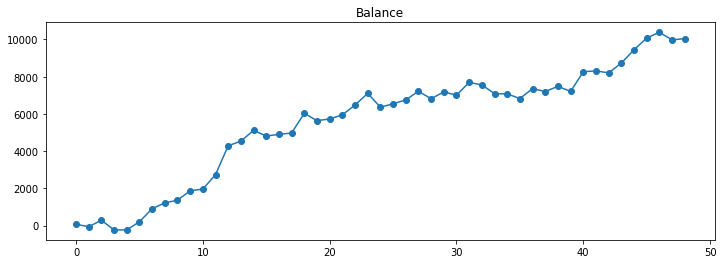

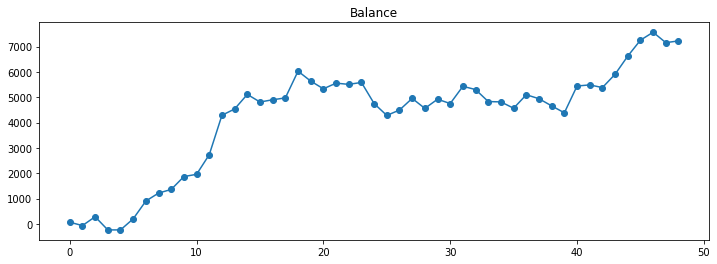

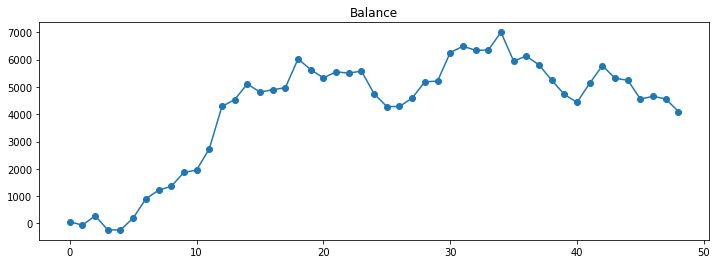

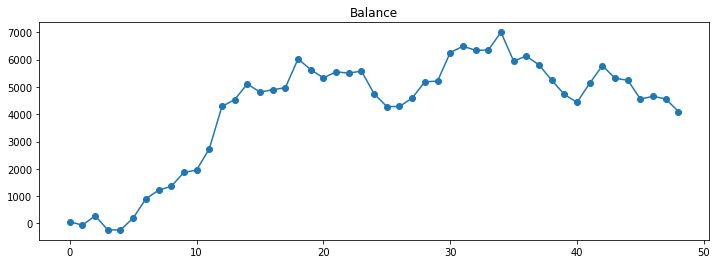

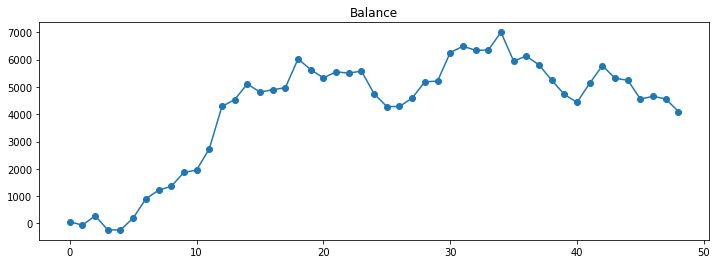

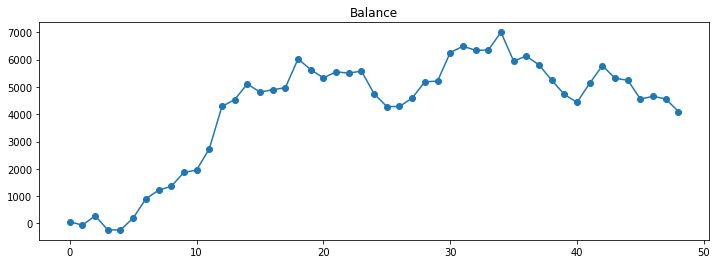

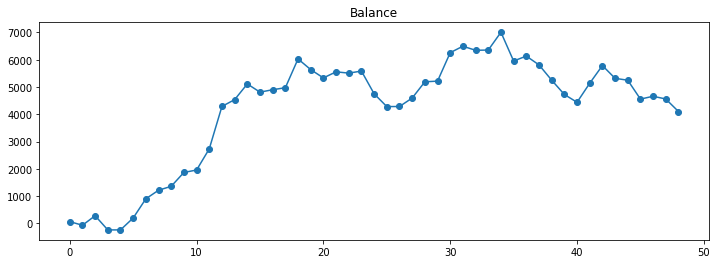

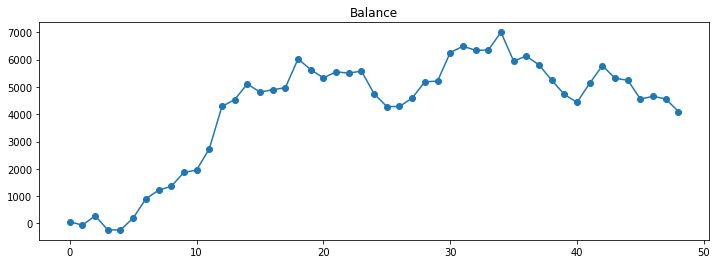

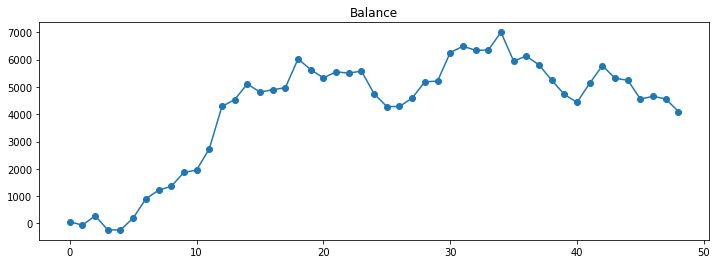

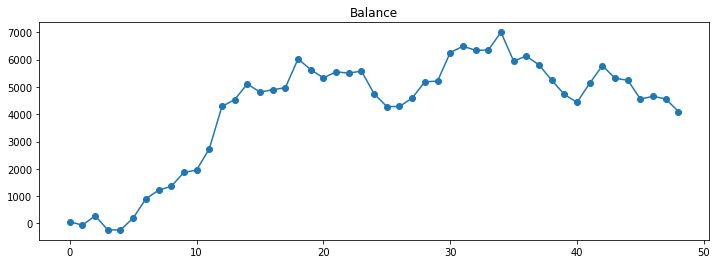

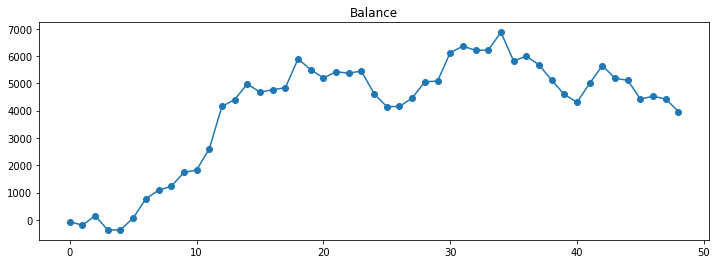

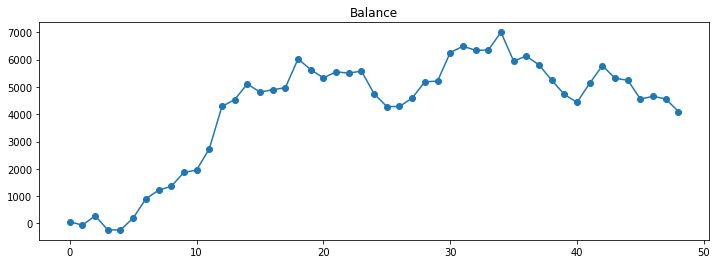

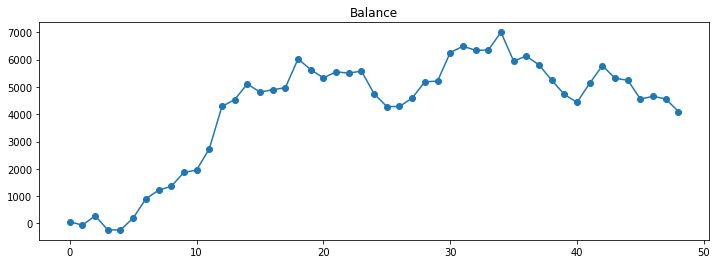

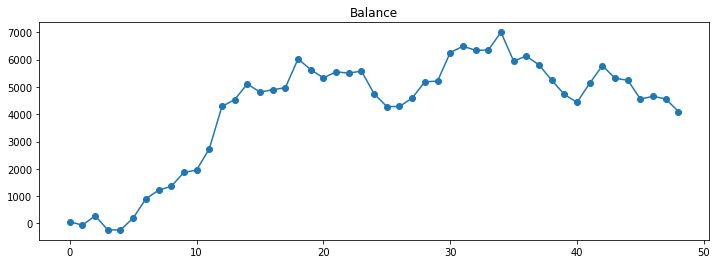

In [8]:
BATCH_SIZE = 200 # bach size - for neural network. In important to learn RF
MEMORY_SIZE = 2000 # Experiece 
ACTION_SPACE = [0, 1, 2]  # short, hold, buy
EPISODES = 20 # Hiw many times we lear RF
X_VAR = train.drop(['reward', 'open_price', 'close_price', 'time'], axis=1).columns
WINDOW = len(X_VAR)
Y_VAR = ['reward']
ARCITECTURE = (256, 256)
horizon = '1'
trader = Agent(
    name='{}_hour_bitcoin_test'.format(horizon),
    window=0,
    type_model="trader_1",  # forward_net, trader_0, trader_1
    data=train.dropna().head(100),
    window_size=WINDOW,
    batch_size=BATCH_SIZE,
    action_space=ACTION_SPACE,
    episodes=EPISODES,
    memory_size=MEMORY_SIZE,
    X_var=X_VAR,
    Y_var=Y_VAR,
    architecture=ARCITECTURE
)
trader.train(load_model=False)

In [9]:
trader.reward.position

{'time_open': Timestamp('2021-03-08 01:00:00'),
 'time_close': Timestamp('2021-03-08 02:00:00'),
 'status': 'close',
 'signal': -1,
 'reward': None,
 'open_price': 51491.1,
 'close_price': None}

In [12]:
test = train.dropna().head(100)